In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.gofplots as sm


In [2]:
# Manually defining the variable type by creating a dictionary object. 
# Treated numerical datatypes in beat, district, ward, community_area and fbi_code as category type variable
# Defined categorical variables in the dataset as category datatype
# Parsed date variables to enable pandas to read the variables as date

type_dict = {'lucr': 'category', 'beat': 'category',
             'district': 'category', 'ward': 'category',
            'community_area': 'category', 'fbi_code': 'category',
            'year': 'category'}

df = pd.read_csv('chicago_crime_dataset_2020_2021.csv', parse_dates=[2,16], dtype=type_dict)

In [3]:
df.head()

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,updated_on,latitude,longitude
0,12014666,JD192060,2020-03-03 11:00:00+00:00,106XX S DREW ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,2212,22,19,72,11,2020,2020-03-25 03:45:43+00:00,41.700484,-87.664555
1,12019548,JD197288,2020-03-29 02:27:00+00:00,002XX W 38TH PL,0420,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,CHA PARKING LOT / GROUNDS,False,False,915,9,3,34,04B,2020,2020-04-05 03:46:47+00:00,41.824547,-87.633055
2,12247082,JD461357,2020-12-17 07:45:00+00:00,062XX S CENTRAL AVE,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,AIRPORT EXTERIOR - NON-SECURE AREA,False,False,813,8,23,64,14,2020,2020-12-24 03:51:05+00:00,41.778886,-87.761749
3,12251361,JD466468,2020-12-14 09:00:00+00:00,034XX W DEVON AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,1711,17,50,13,10,2020,2020-12-25 03:44:53+00:00,41.997306,-87.714593
4,12250284,JD465007,2020-12-21 06:20:00+00:00,003XX W PERSHING RD,1345,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,STREET,False,False,915,9,3,34,14,2020,2020-12-28 03:51:07+00:00,41.823621,-87.633370


# Exploratory Data Analysis

In [4]:
# Checking the dimensions of the dataset

df.shape

(394906, 19)

## Observation

The dataset contains 394906 observations and 19 features/variables

In [5]:
# Checking the data types of the features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394906 entries, 0 to 394905
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   unique_key            394906 non-null  int64              
 1   case_number           394906 non-null  object             
 2   date                  394906 non-null  datetime64[ns, UTC]
 3   block                 394906 non-null  object             
 4   iucr                  394906 non-null  object             
 5   primary_type          394906 non-null  object             
 6   description           394906 non-null  object             
 7   location_description  393075 non-null  object             
 8   arrest                394906 non-null  bool               
 9   domestic              394906 non-null  bool               
 10  beat                  394906 non-null  category           
 11  district              394906 non-null  category     

## Observation

Overall the data looks complete with a few variables such as location_description, ward, latitude and longitude with some missing values which are less than 1% of total observations. Hence, it will not have any significant impact on our analysis.

<AxesSubplot:>

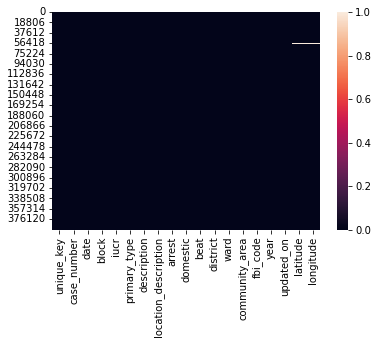

In [6]:
# Checking completeness of dataset

sns.heatmap(df.isnull())

## Observation

Except for latitude and longitude, all the variables are complete and missing values are under 1%

In [7]:
# Extracting Day name, month name and time of from the date variable 

df['Day'] = df['date'].dt.day_name()
df['Month'] = df['date'].dt.month_name()
df['Time'] = df['date'].dt.time
df['Hour'] = df['date'].dt.hour

# Converting extracted hour variable to numeric type
df['Hour'] = pd.to_numeric(df.Hour, errors='coerce')


In [8]:
# Checking the newly created variables after extracting

df.head()


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,community_area,fbi_code,year,updated_on,latitude,longitude,Day,Month,Time,Hour
0,12014666,JD192060,2020-03-03 11:00:00+00:00,106XX S DREW ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,72,11,2020,2020-03-25 03:45:43+00:00,41.700484,-87.664555,Tuesday,March,11:00:00,11
1,12019548,JD197288,2020-03-29 02:27:00+00:00,002XX W 38TH PL,0420,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,CHA PARKING LOT / GROUNDS,False,False,...,34,04B,2020,2020-04-05 03:46:47+00:00,41.824547,-87.633055,Sunday,March,02:27:00,2
2,12247082,JD461357,2020-12-17 07:45:00+00:00,062XX S CENTRAL AVE,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,AIRPORT EXTERIOR - NON-SECURE AREA,False,False,...,64,14,2020,2020-12-24 03:51:05+00:00,41.778886,-87.761749,Thursday,December,07:45:00,7
3,12251361,JD466468,2020-12-14 09:00:00+00:00,034XX W DEVON AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,...,13,10,2020,2020-12-25 03:44:53+00:00,41.997306,-87.714593,Monday,December,09:00:00,9
4,12250284,JD465007,2020-12-21 06:20:00+00:00,003XX W PERSHING RD,1345,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,STREET,False,False,...,34,14,2020,2020-12-28 03:51:07+00:00,41.823621,-87.633370,Monday,December,06:20:00,6


In [9]:
# Creating seperate list of categorical and numerical variables
# This will help us run seperate functions easily on our desired variable set

categorical_variables = []
numerical_variables = []
for column in list(df.columns):
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        numerical_variables.append(column)
    else:
        categorical_variables.append(column)

In [10]:
categorical_variables

['case_number',
 'date',
 'block',
 'iucr',
 'primary_type',
 'description',
 'location_description',
 'arrest',
 'domestic',
 'beat',
 'district',
 'ward',
 'community_area',
 'fbi_code',
 'year',
 'updated_on',
 'Day',
 'Month',
 'Time']

In [11]:
numerical_variables

['unique_key', 'latitude', 'longitude', 'Hour']

In [12]:
categorical_variables

['case_number',
 'date',
 'block',
 'iucr',
 'primary_type',
 'description',
 'location_description',
 'arrest',
 'domestic',
 'beat',
 'district',
 'ward',
 'community_area',
 'fbi_code',
 'year',
 'updated_on',
 'Day',
 'Month',
 'Time']

In [13]:
# Checking cardinality of categorial variables in our dataset


df[categorical_variables].nunique()

case_number             394844
date                    166925
block                    30355
iucr                       323
primary_type                33
description                428
location_description       169
arrest                       2
domestic                     2
beat                       274
district                    23
ward                        50
community_area              77
fbi_code                    26
year                         2
updated_on                1384
Day                          7
Month                       12
Time                       797
dtype: int64

## Observation

We could witness the number of categories in each variable through this. The value of primary_type is 33 which shows that there are 33 types of crime in our dataset. While description is a furtherance to the crime type and has 428 types.

In [14]:
# Checking Top Frequency or Mode Values of the All the categorical variables

df[categorical_variables].describe().transpose()

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_12168/112095158.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[categorical_variables].describe().transpose()


,count,unique,top,freq,first,last
case_number,394906,394844,JE266473,5,NaT,NaT
date,394906,166925,2020-01-01 12:00:00+00:00,113,2020-01-01 01:00:00+00:00,2021-11-23 12:59:00+00:00
block,394906,30355,001XX N STATE ST,788,NaT,NaT
iucr,394906,323,0486,38319,NaT,NaT
primary_type,394906,33,BATTERY,77944,NaT,NaT
description,394906,428,SIMPLE,45124,NaT,NaT
location_description,393075,169,STREET,97231,NaT,NaT
arrest,394906,2,False,339021,NaT,NaT
domestic,394906,2,False,314880,NaT,NaT
beat,394906,274,1834,3787,NaT,NaT


## Observation

Looking at the mode values helps us to identtify the most common value occuring in each varible of the dataset. 
As we could observe that the most frequent/common crime is Battery which occurs 77944 times out of 394906 observations in our dataset.

The definition of battery crime is:

Simple Battery (08B)
(Crimes Against Persons)
Definition: A person commits battery if he intentionally or knowingly without legal justification and by any means, (1) causes bodily harm to an individual or (2) makes physical contact of an insulting or provoking nature with an individual.
Source: https://gis.chicagopolice.org/pages/crime_details

Additional Observations:

-Streets are a common location for crimes

-Almost all of the crimes (339021 out of 394906) don't lead to arrest

-Sundays and July month witness more than average rate of crimes

# Exploration Through Visualization

<AxesSubplot:title={'center':'frequency distribution of  number of crimes'}, xlabel='year', ylabel='count'>

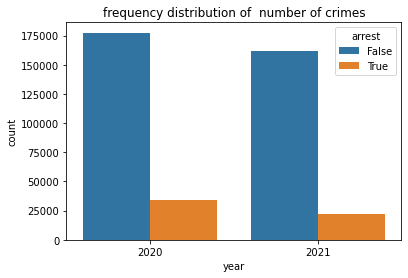

In [15]:
# Checking the frequency distribution of  number of crimes and if they lead to arrest for both years

plt.title('frequency distribution of  number of crimes')
sns.countplot(data=df, x='year', hue='arrest')

## Observation

We see that the data is almost equally distributed amongst both the years with 2020 having higher number of observations.  Since our dataset covers crimes reported from 01-01-2020 to 11-23-2021 which is one month short of 2 years, it will be not be a good decision to comment on the overall crimes coming down from 2020 to 2021. The crimes could be down in 2021 due to incompleteness of the data as we are not comparing the whole 2021 year

In [16]:
# Creating a function for getting percentage annotations on our countplots

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y), size = 12)

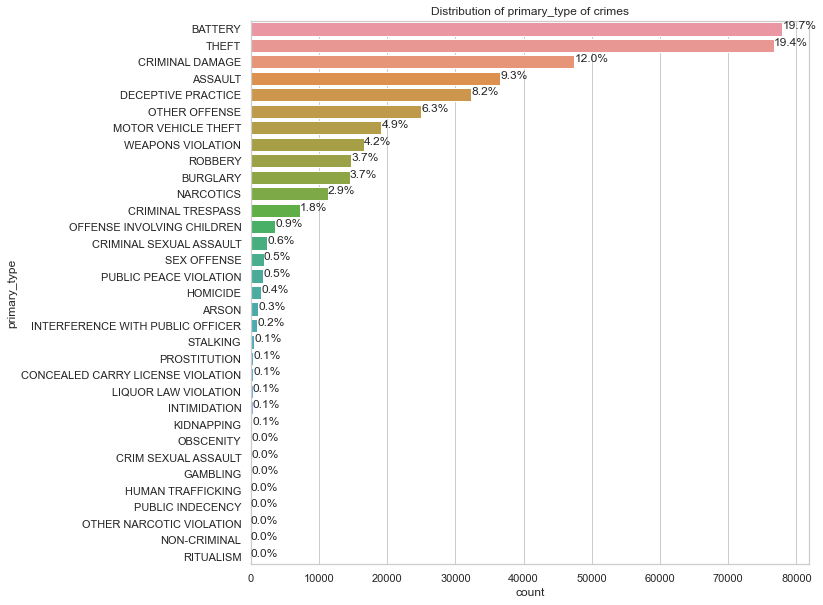

In [17]:
# Checking distribution of primary_type of crimes

sns.set(style='whitegrid')
plt.figure(figsize=(10,10))
ax = sns.countplot(y='primary_type', data=df, order=df['primary_type'].value_counts().index )
plt.title('Distribution of primary_type of crimes')
without_hue(ax, df.primary_type)

## Observation

After the most frequent crime type Battery, theft is the second most occuring crime type in Chicago. It has almost the same percentage as Battery. 

Battery, Theft and Criminal Damage together account for 50% of all the crimes in the city. While, ritualism the least occuring crime type

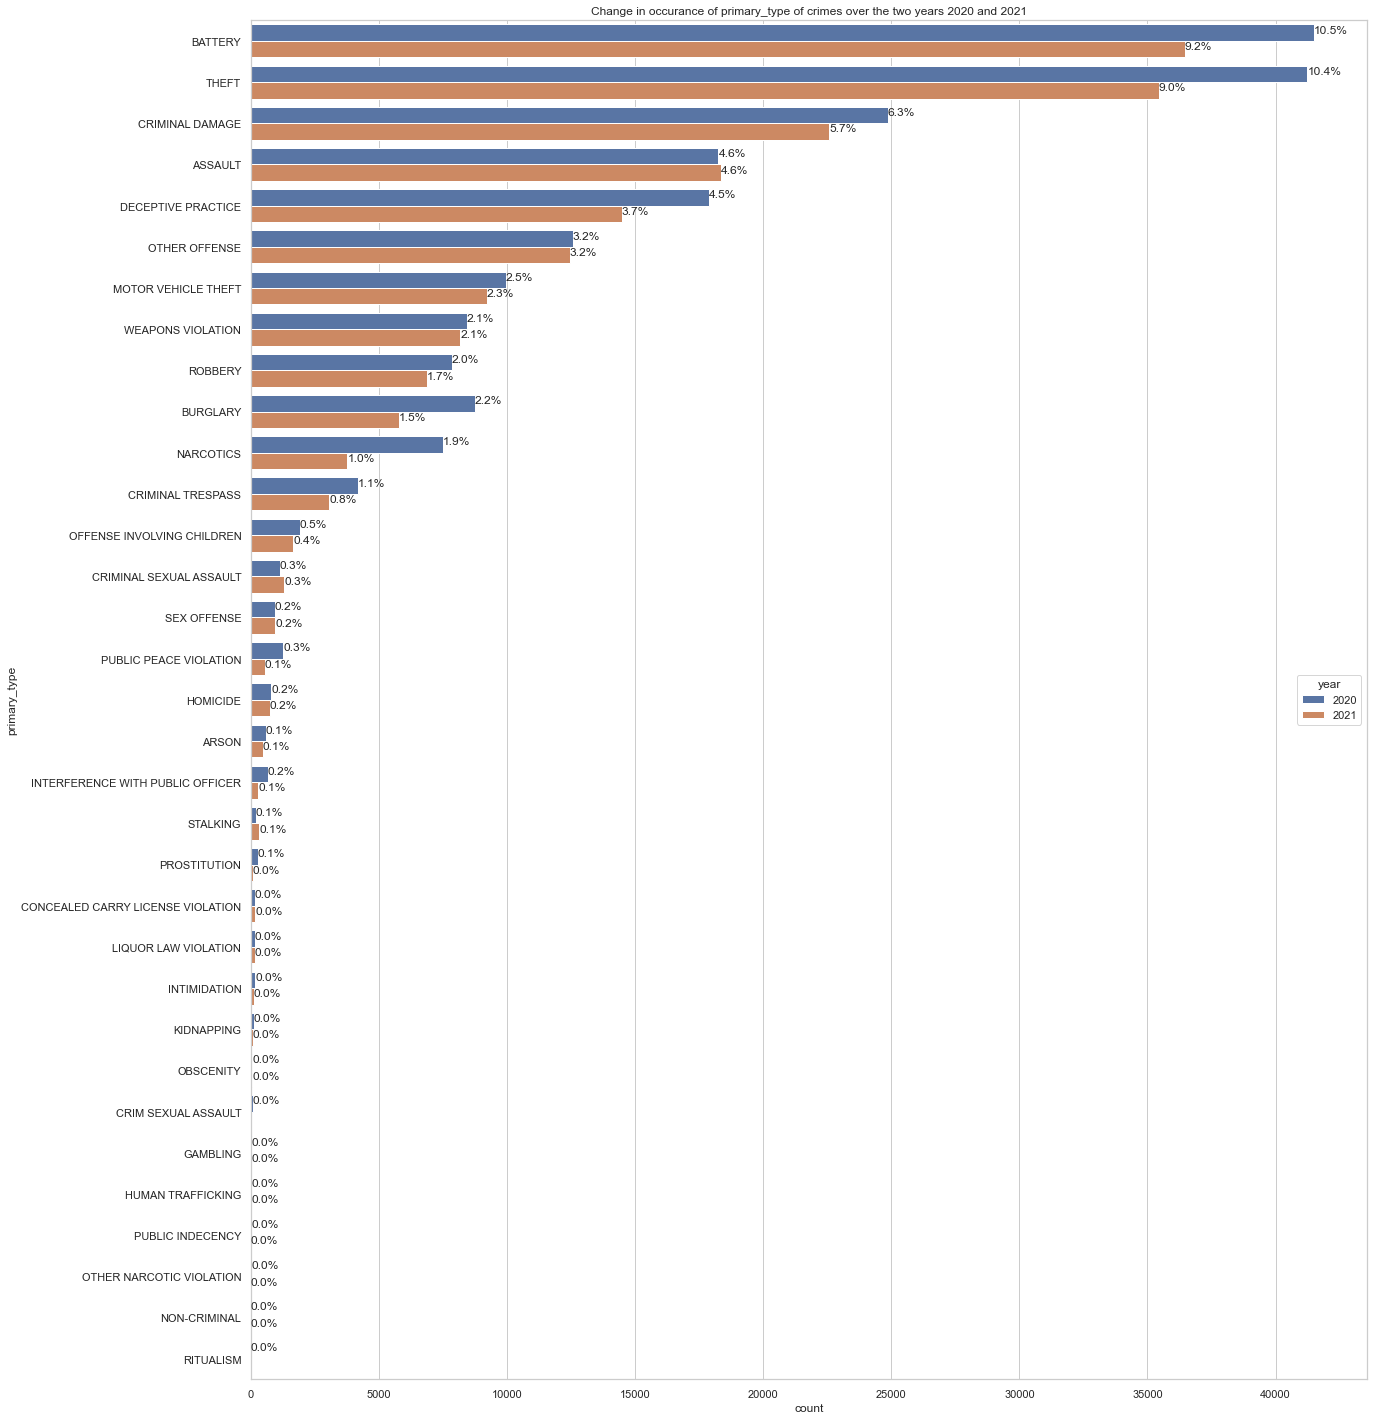

In [18]:
# Plotting change in occurance of primary_type of crimes over the two years 2020 and 2021

sns.set(style='whitegrid')
plt.figure(figsize=(20,25))
ax = sns.countplot(y='primary_type', data=df, order=df['primary_type'].value_counts().index, hue='year' )
plt.title('Change in occurance of primary_type of crimes over the two years 2020 and 2021')
without_hue(ax, df.primary_type)

## Observation

The horizontal barchart splits the percentage in years 2020 and 2021 which makes us easier to visualize the change in the percentage levels of each crime type. 

We observe a general trend of reduction in crime across all the crime categories which is obvious as there was a reduction in crimes from 2020 to 2021 (probably due to period mismatch)

However, irrespective of the general downtrend, crime like such as Assault, Weapons Violation and Other Offence  show no reduction in the crime rate and have the same proportion over both years.

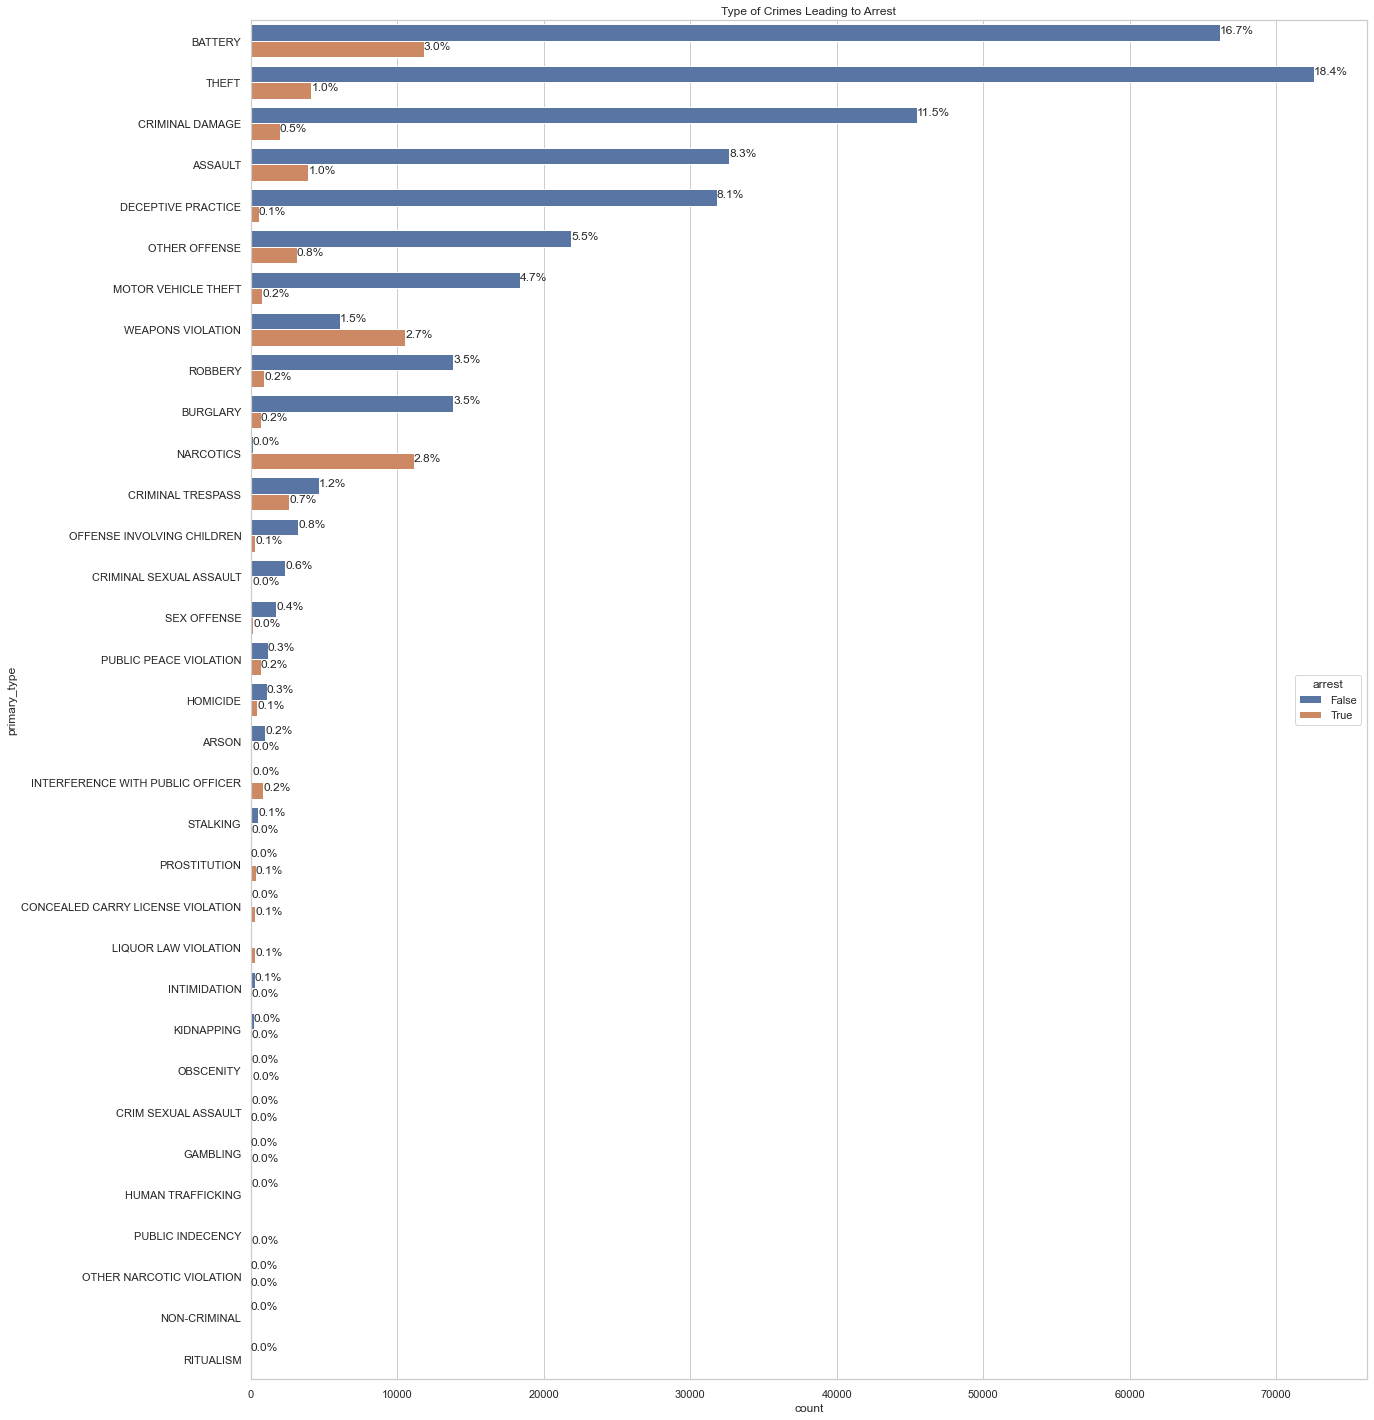

In [19]:
# Plotting proportion of crimes that are leading to arrest

sns.set(style='whitegrid')
plt.figure(figsize=(20,25))
ax = sns.countplot(y='primary_type', data=df, order=df['primary_type'].value_counts().index,  hue='arrest' )
without_hue(ax, df.primary_type)
plt.title('Type of Crimes Leading to Arrest')
plt.show()

## Observation

We observe that battery crime type leads to highest percentage of arrests. While narcotics crime type occurs infrequently but still leads to high percentage of arrests. All crimes in narcotics type leads to arrest



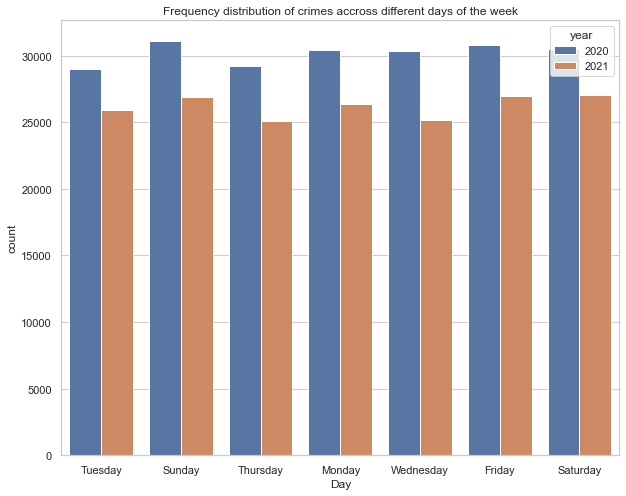

In [20]:
# Plotting frequency distribution of crimes accross different days of the week

plt.figure(figsize=(10,8))
plt.title('Frequency distribution of crimes accross different days of the week')
sns.countplot(data=df, x='Day', hue='year')
plt.show()

## Observation

There is a uniform distribution of values across all days for both the years which shows that there are crimes happening on every day of the week while Sunday leads in both the years which has highest count among all days in both years

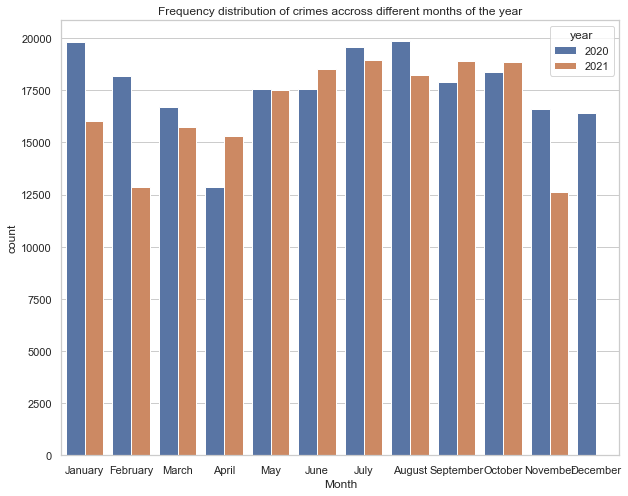

In [21]:
# Plotting frequency distribution of crimes accross different months of the year

plt.figure(figsize=(10,8))
plt.title('Frequency distribution of crimes accross different months of the year')
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(data=df, x='Month', order= month_list , hue='year')
plt.show()

## Observation

There is a general average of about 18,000 crimes each month of the both years for the City of Chicago. While some months are peaking and some are lower on some months, but there seems to be a uniform distribution of crime rate accross different months for both years. We don't have data on December month of 2021 and also November month has crimes till November 23 only.

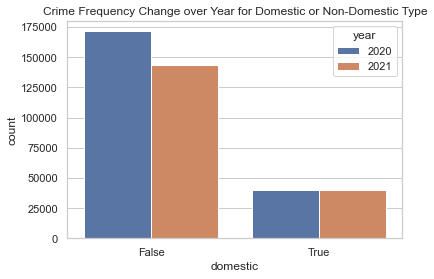

In [22]:
# Domestic crime rate for both years

plt.title('Crime Frequency Change over Year for Domestic or Non-Domestic Type')
sns.countplot(data=df, x='domestic', hue='year')
plt.show()


## Observation

The domestic crime rate remains the same for both years, while there is a reduction in the non-domestic violence from 2020 to 2021

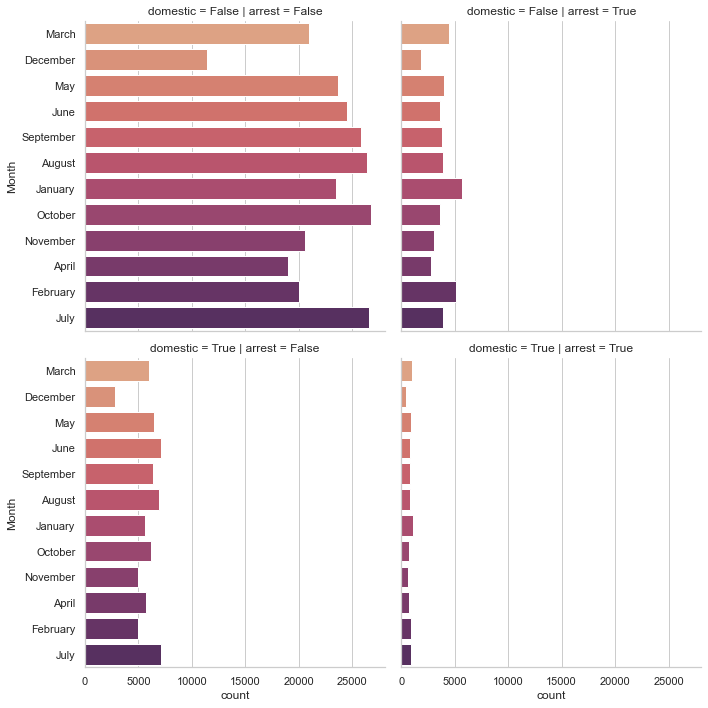

In [23]:
# Visualizing month wise crime counts for domestic violence and whether it leads to arrest or not

sns.catplot(data=df, y='Month', kind='count', row='domestic', col='arrest', palette='flare')
plt.show()

## Observation

We observe that highest proportion of crimes is in non-domestic violence which doesn't lead to arrest. Leading months in this category are October and July.
In Domestic violence not leading to arrest June and July are the months with higher counts of crime.
In crimes leading to arrest, January is the month with highest number of crimes.

In [24]:
# We want to visualize what are the common locations of crime in the City of Chicago
# Since the location_description variable is highly cardinal, we chose to filter locations having frequency more than 1000

# We have created an object df_popular_location which is our desired filtered variable of location_description

df_popular_location = df.loc[df.groupby("location_description")["location_description"].transform("size") > 1000].location_description
df_popular_location 

0                  RESIDENCE
3                  RESIDENCE
4                     STREET
5         SMALL RETAIL STORE
6                  RESIDENCE
                 ...        
394900                STREET
394902              SIDEWALK
394903              SIDEWALK
394904              SIDEWALK
394905              SIDEWALK
Name: location_description, Length: 371926, dtype: object

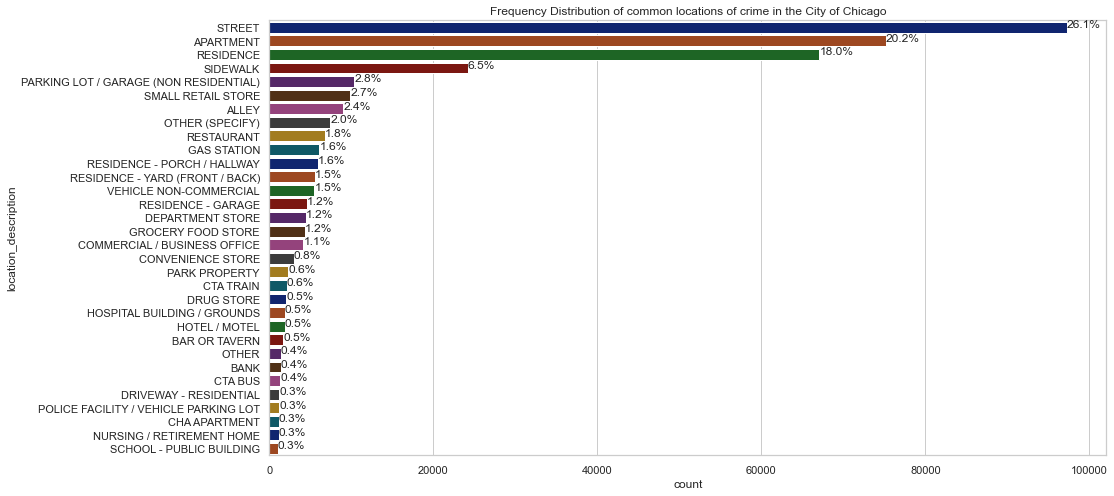

In [25]:
# Visualizing the most common locations of crime in the City of Chicago

sns.set(style='whitegrid')
plt.figure(figsize=(15,8))
plt.title('Frequency Distribution of common locations of crime in the City of Chicago')
ax = sns.countplot(y=df_popular_location, data=df, order=df_popular_location.value_counts().index,  palette='dark' )
without_hue(ax, df_popular_location)

## Observation

Street, apartment and residence are the most common occuring crime location in the city of chicago accounting for over 50% of all the crimes in the city. There is a huge gap between these three locations and all other crime locations of the city which shows that the City needs to prioritze these locations more to bring down crime rate in the city

In [26]:
# Filtering out the dataset to analyze top crime locations further in detail

top_crime_locations = ['STREET', 'RESIDENCE', 'APARTMENT']
df_top_crime_locations = df[df.location_description.isin(top_crime_locations)]

In [27]:
# Checking the resulting shape of the filtered dataset df_top_crime_locations

df_top_crime_locations.shape

(239468, 23)

## Observation

Out of 394906 total observations in the dataset, top three crime locations Street, Residence and Apartments contain 239468 observations, i.e. approx 60% of the crime in our data is happening on these three locations only.

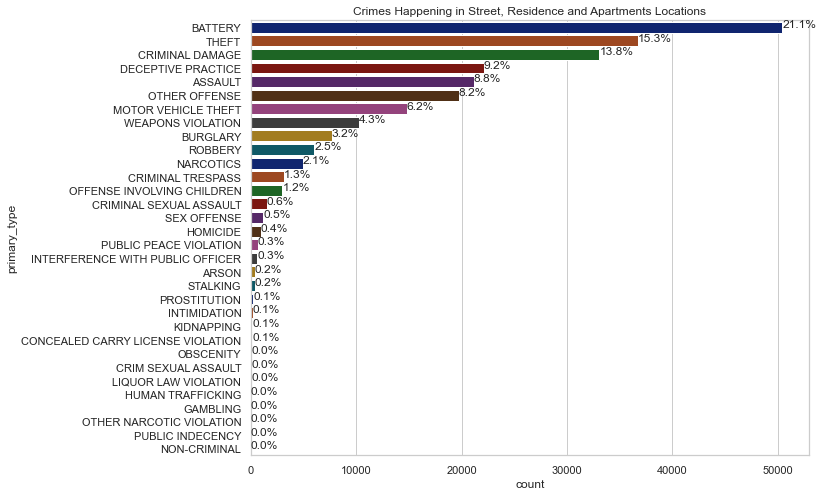

In [28]:
# Visualizing the types of crimes happening in these three locations

plt.figure(figsize=(10,8))
plt.title('Crimes Happening in Street, Residence and Apartments Locations')
ax = sns.countplot(data=df_top_crime_locations, 
                   y=df_top_crime_locations.primary_type, 
                   order=df_top_crime_locations.primary_type.value_counts().index, 
                   palette='dark')
without_hue(ax, df_top_crime_locations.primary_type)
plt.show()

## Observation

We observe the common trend of top three crimes on these locations too: Battery, Theft and Criminal Damage. Although, we do see that deceptive practice, assualt, motorvehicle theft and other offence also account for over 25% combined in these locations

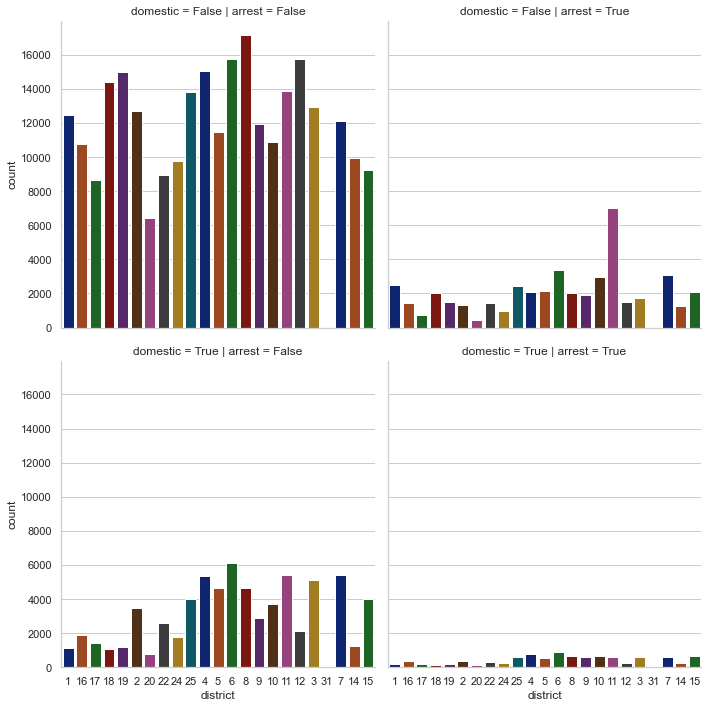

In [29]:
# Visualizing counts of crimes in different districts and categorizing them based on domestic or non domestic and whether they lead to arrest or not

sns.catplot(data=df, x='district', kind='count', row='domestic', col='arrest', palette='dark')
plt.show()


## Observation

We observe that District 8 contains highest count of crime in non-domestic non-arrest worthy crimes.
While for crimes leading to arrest or more violent in nature and which are non-domestic, District 11 has the highest number.
We also do observe that district 31 is the one which doesn't contain any crime count in all four sub-categories which could be a data collection error or data reporting bias.

In [30]:
# We are interested in drilling down in district 11 where most of the violent crimes are happening and see what is profile of crimes
# Creating a seperate dataframe for referring to District 11

df11 = df[df.district == '11']

In [31]:
# Checking the cardinality of the variables in District 11 dataframe

df11[categorical_variables].nunique()

case_number             26859
date                    23174
block                    1103
iucr                      247
primary_type               30
description               299
location_description      114
arrest                      2
domestic                    2
beat                       17
district                    1
ward                        7
community_area              7
fbi_code                   26
year                        2
updated_on               1216
Day                         7
Month                      12
Time                      732
dtype: int64

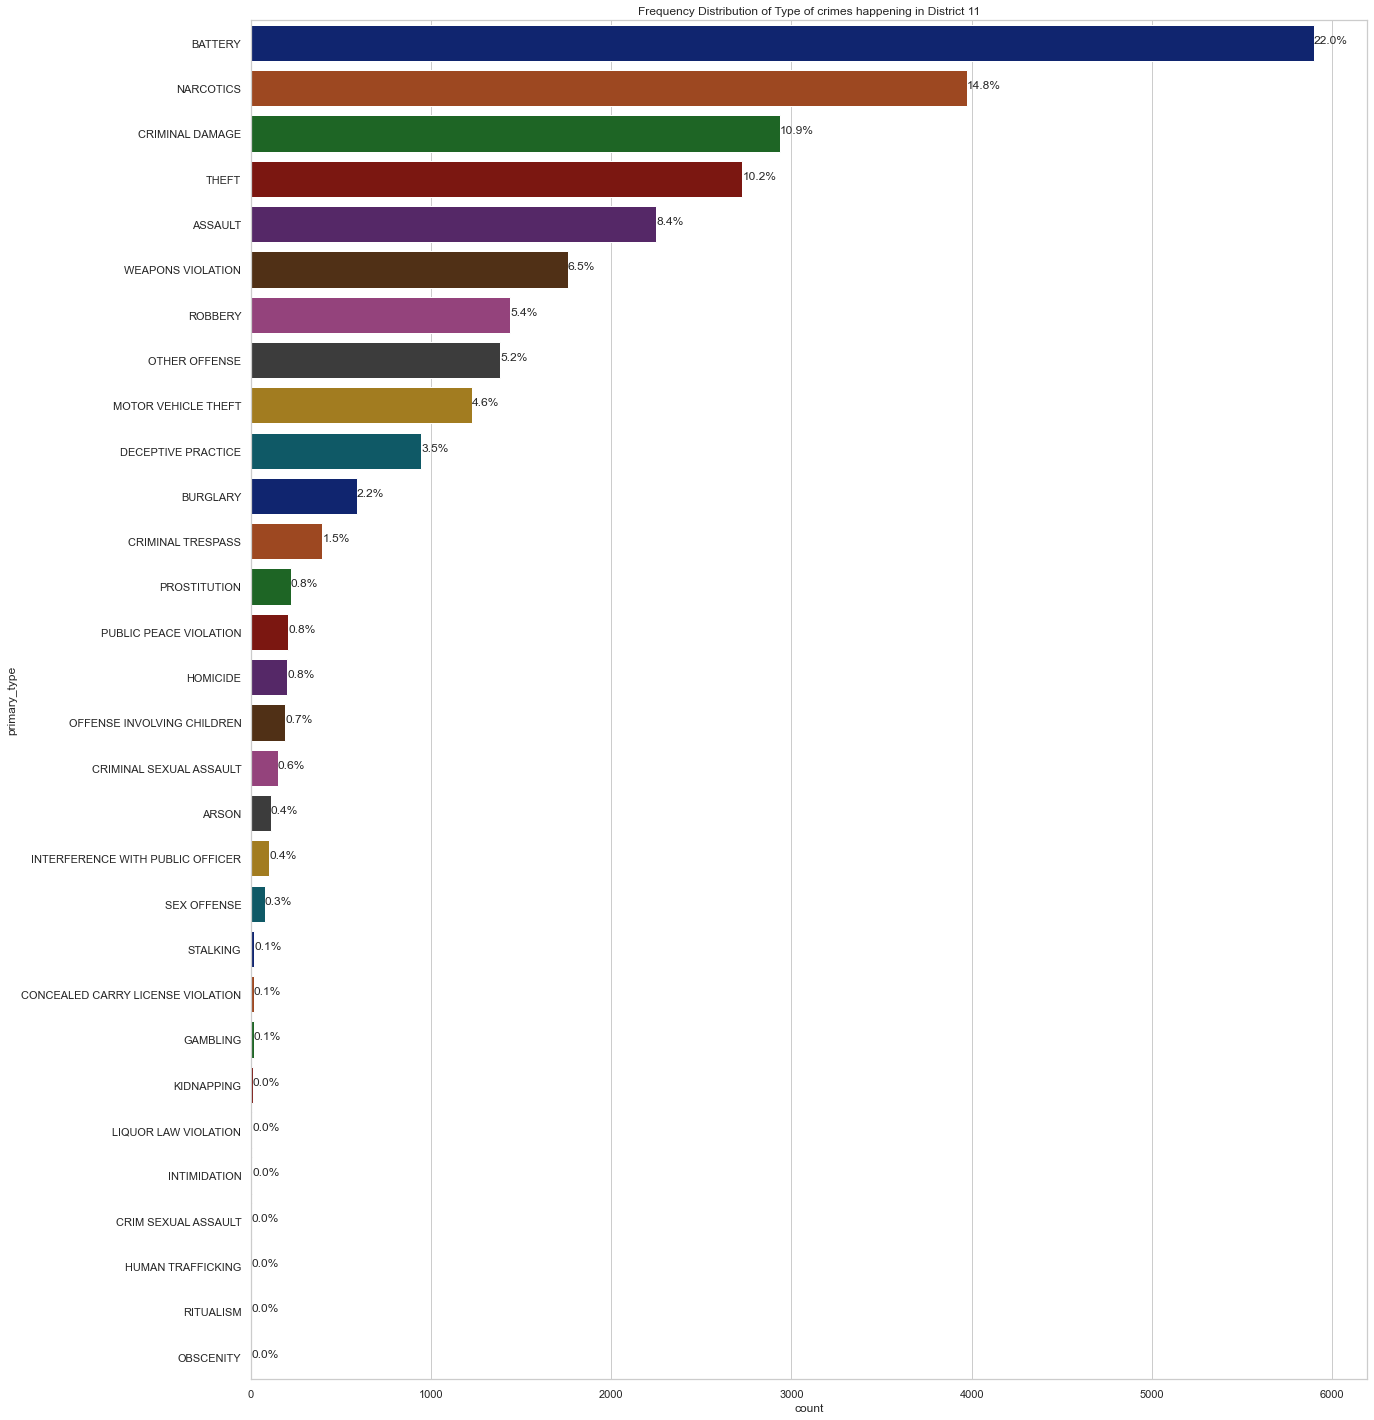

In [32]:
# Visualizing the type of crimes happening in District 11


sns.set(style='whitegrid')
plt.figure(figsize=(20,25))
plt.title('Frequency Distribution of Type of crimes happening in District 11')
ax = sns.countplot(y='primary_type', data=df11, order=df11['primary_type'].value_counts().index,  palette='dark' )
without_hue(ax, df11.primary_type)

## Observation 

We observe that District 11 has very high proportion of narcotics around 15% which is way higher than the total Narcotics crime in the City which is around 3% for the whole data.
This could be a reason why there are more arrests in the District 11

In [33]:
# Checking proportion of narcotics crime in District 11 out of total narcotics crimes in the data

len(df11[df11.primary_type == 'NARCOTICS']) / len(df[df.primary_type == 'NARCOTICS'])

0.352998667258996

## Observation

We find that around 35% narcotics crimes of all the City happen in District 11 alone, which is a reason of concern. Due to this high proportion of narcotics type crime, there is a high arrest ratio in this district.

In [34]:
# We are interested in visualizing what are common locations of crime in District 11
# Since crime location is highly cardinal, we have visualized locations with more than 100 crimes

# Creating an object dataframe which contains a filtered dataframe that contains observations of district 11 with only those locations having more than 100 crimes

df11_location = df11.loc[df11.groupby("location_description")["location_description"].transform("size") > 100].location_description
df11_location

83555       OTHER (SPECIFY)
83559              SIDEWALK
83566                STREET
83568             APARTMENT
83601             APARTMENT
                ...        
394901    VACANT LOT / LAND
394902             SIDEWALK
394903             SIDEWALK
394904             SIDEWALK
394905             SIDEWALK
Name: location_description, Length: 25239, dtype: object

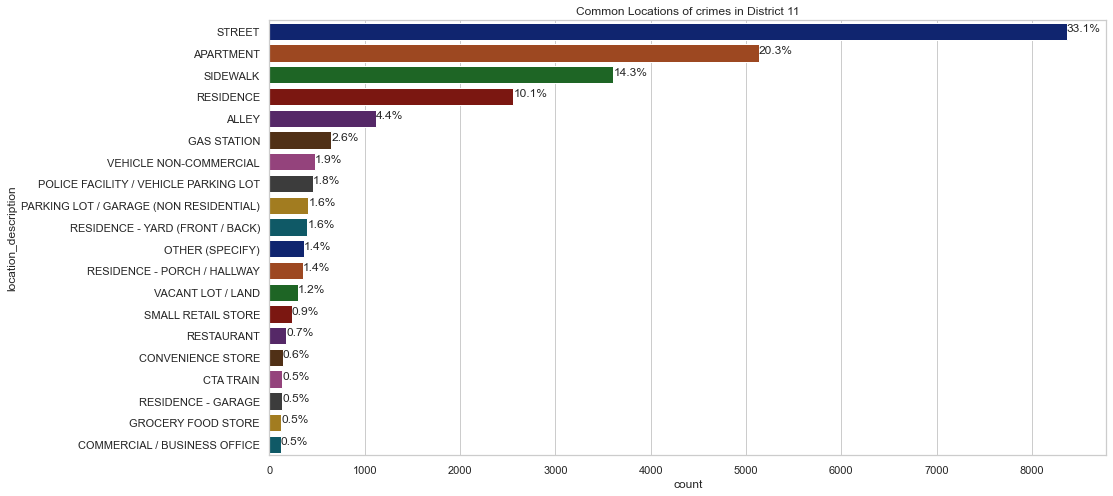

In [35]:
# Visulizing locations of common crimes in District 11

sns.set(style='whitegrid')
plt.figure(figsize=(15,8))
plt.title('Common Locations of crimes in District 11')
ax = sns.countplot(y=df11_location, data=df[df.district == '11'], order=df11_location.value_counts().index,  palette='dark' )
without_hue(ax, df11_location)


## Observation

We observe that District 11 which is most violent crime district as it has highest number of arrests. This district has almost 53% of crimes happening on the street and apartment alone. Hence, the City of Chicago should ensure more security on the streets and apartments of District 11 to bring down the violent crime rate in this particular district 11 

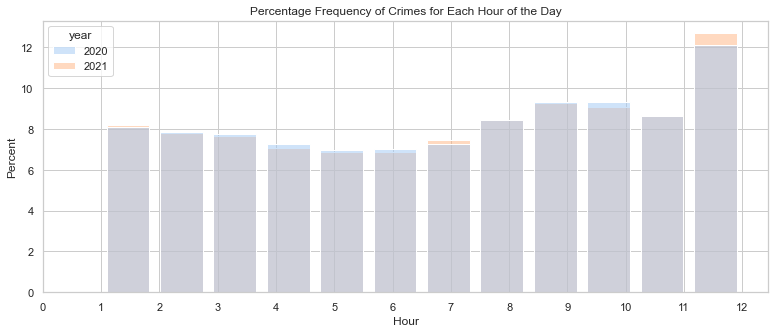

In [36]:
# Plotting frequency distribution of hour of the day when the crime is committed for both years 2020 and 2021


plt.figure(figsize=(13,5))
sns.histplot(data=df, x='Hour',  palette='pastel',  bins=12, hue='year', stat='percent', common_norm=False,   shrink=.8)
plt.xticks(list(range(0,13)))
plt.title('Percentage Frequency of Crimes for Each Hour of the Day')
plt.show()

## Observation

We observe that the hour 12, i.e between 12pm-1pm is the peak time for crimes accounting for 12% of the total crimes over both years.
We also do observe through this visualization is that the time values in the data are only ranging from 0000hrs to 1240 hours, i.e between 12 am to 12.40 pm. We don't have data on crimes happening between 1pm to 11.59pm

This could be a data reporting error or data collection bias.

<Figure size 7500x4000 with 0 Axes>

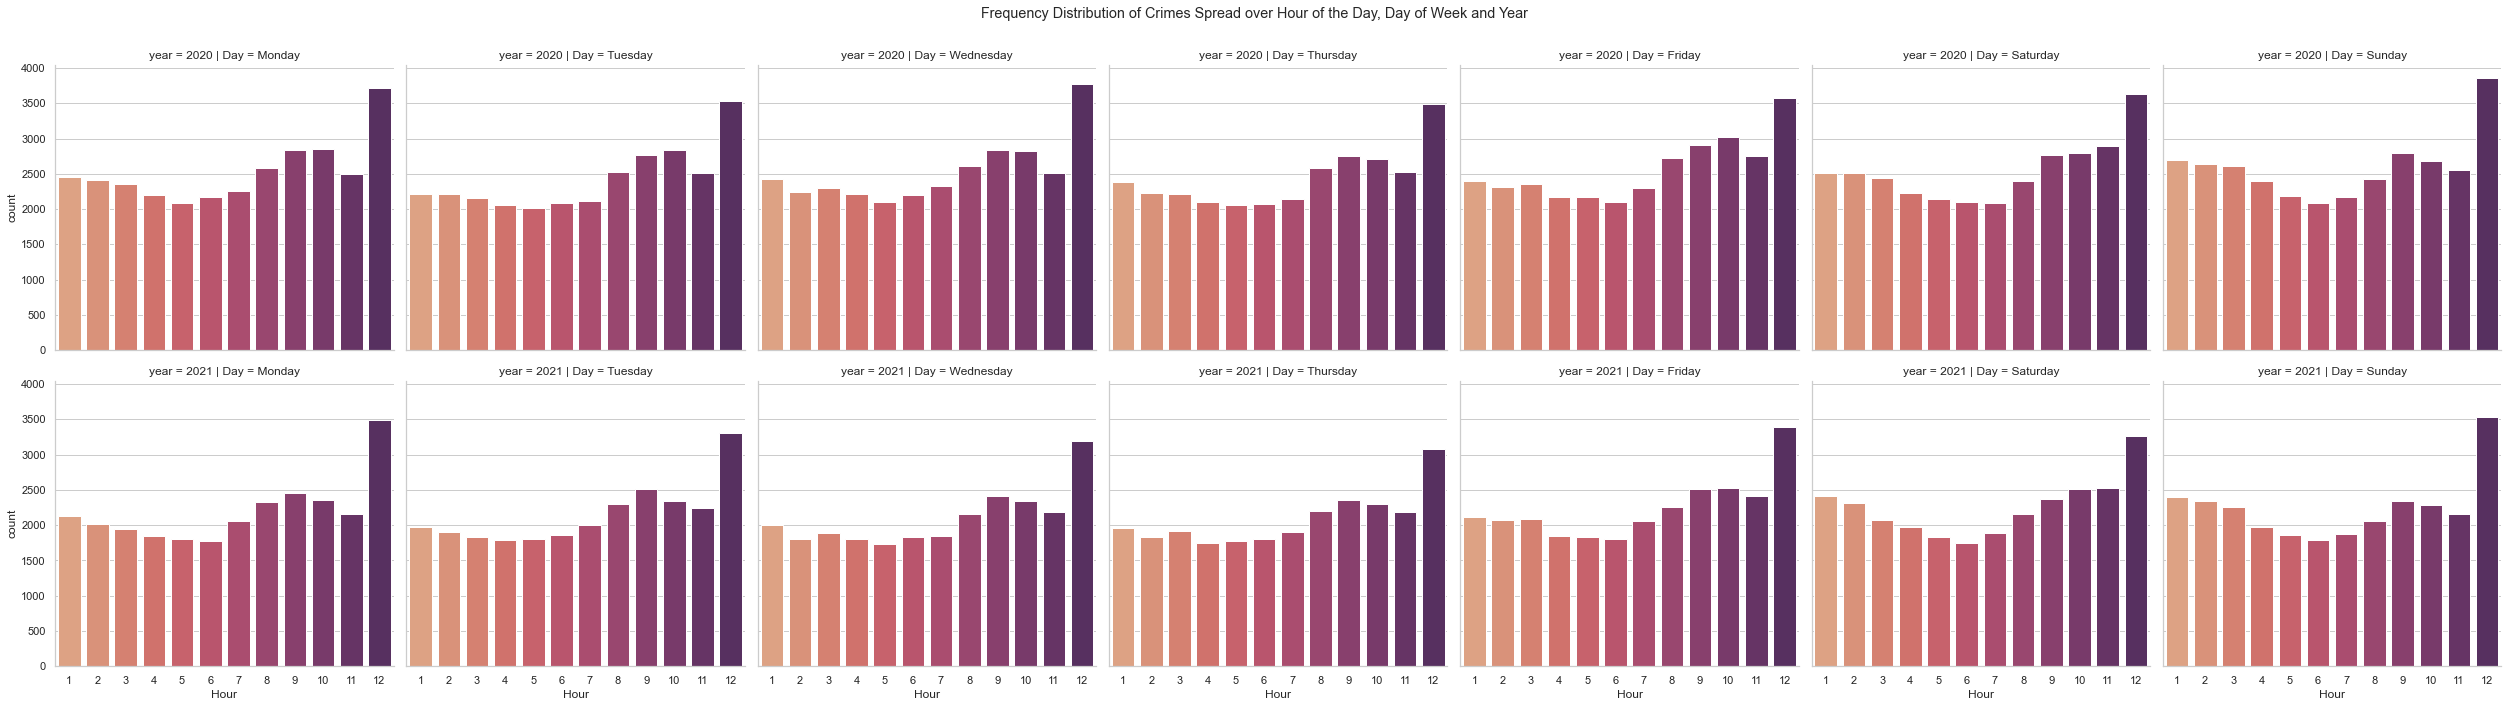

In [67]:
# Visualizing Distribution of crime frequency amongst hours of the day for every day of the week and comparing it for both years

plt.figure(figsize=(15,8), dpi=500)
Days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rp = sns.catplot(data=df, x='Hour', kind='count',  col='Day', palette='flare', row='year', col_order=Days)
rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Frequency Distribution of Crimes Spread over Hour of the Day, Day of Week and Year')
plt.show()



## Observation

We observe here that the pattern of crimes for specific hour of the day, i.e 12pm peak time of crimes happening, is following the same for all days of the week. Moreover, the pattern remains the same for both the years. There is not much difference in the shape of distribution among days of the week and year of crime.

# Inferential Statistics: Applying Logistic Regression

In [38]:
# Since we have a lot of features to our variables, we have manually picked up variables for our regression modelling
# Created a new dataframe df_ml and picked relevant variables
# Arrest we be our target(outcome variable)
# Our modelling will be done to predict and analyze what variables are leading to arrest of people

df_ml = df[['case_number','primary_type', 'description', 'location_description', 'Day', 'Month','domestic', 'arrest']]
df_ml

,case_number,primary_type,description,location_description,Day,Month,domestic,arrest
0,JD192060,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,Tuesday,March,False,False
1,JD197288,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,CHA PARKING LOT / GROUNDS,Sunday,March,False,False
2,JD461357,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,AIRPORT EXTERIOR - NON-SECURE AREA,Thursday,December,False,False
3,JD466468,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,Monday,December,False,False
4,JD465007,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,STREET,Monday,December,False,False
...,...,...,...,...,...,...,...,...
394901,JE245870,NARCOTICS,POSSESS - CRACK,VACANT LOT / LAND,Friday,May,False,True
394902,JD433918,NARCOTICS,POSSESS - CRACK,SIDEWALK,Tuesday,November,False,True
394903,JD408554,NARCOTICS,POSSESS - CRACK,SIDEWALK,Friday,October,False,True
394904,JE322567,NARCOTICS,POSSESS - CRACK,SIDEWALK,Sunday,August,False,True


In [39]:
# Converting arrest variable into binary type and giving  modified value to Domestic Variable which will be useful for further process

df_ml['arrest'] = df_ml['arrest'].astype(np.int64)
df_ml['domestic'] = df_ml['domestic'].map({True: 'Domestic_True', False: 'Domestic_False'})
df_ml

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_12168/1963485820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['arrest'] = df_ml['arrest'].astype(np.int64)
C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_12168/1963485820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['domestic'] = df_ml['domestic'].map({True: 'Domestic_True', False: 'Domestic_False'})


,case_number,primary_type,description,location_description,Day,Month,domestic,arrest
0,JD192060,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,Tuesday,March,Domestic_False,0
1,JD197288,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,CHA PARKING LOT / GROUNDS,Sunday,March,Domestic_False,0
2,JD461357,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,AIRPORT EXTERIOR - NON-SECURE AREA,Thursday,December,Domestic_False,0
3,JD466468,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,Monday,December,Domestic_False,0
4,JD465007,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,STREET,Monday,December,Domestic_False,0
...,...,...,...,...,...,...,...,...
394901,JE245870,NARCOTICS,POSSESS - CRACK,VACANT LOT / LAND,Friday,May,Domestic_False,1
394902,JD433918,NARCOTICS,POSSESS - CRACK,SIDEWALK,Tuesday,November,Domestic_False,1
394903,JD408554,NARCOTICS,POSSESS - CRACK,SIDEWALK,Friday,October,Domestic_False,1
394904,JE322567,NARCOTICS,POSSESS - CRACK,SIDEWALK,Sunday,August,Domestic_False,1


In [40]:
df_ml

,case_number,primary_type,description,location_description,Day,Month,domestic,arrest
0,JD192060,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,Tuesday,March,Domestic_False,0
1,JD197288,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,CHA PARKING LOT / GROUNDS,Sunday,March,Domestic_False,0
2,JD461357,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,AIRPORT EXTERIOR - NON-SECURE AREA,Thursday,December,Domestic_False,0
3,JD466468,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,Monday,December,Domestic_False,0
4,JD465007,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,STREET,Monday,December,Domestic_False,0
...,...,...,...,...,...,...,...,...
394901,JE245870,NARCOTICS,POSSESS - CRACK,VACANT LOT / LAND,Friday,May,Domestic_False,1
394902,JD433918,NARCOTICS,POSSESS - CRACK,SIDEWALK,Tuesday,November,Domestic_False,1
394903,JD408554,NARCOTICS,POSSESS - CRACK,SIDEWALK,Friday,October,Domestic_False,1
394904,JE322567,NARCOTICS,POSSESS - CRACK,SIDEWALK,Sunday,August,Domestic_False,1


In [41]:
# Creating a function to reduce the cardinality of the variables by defining thresholds
# Through this function we try to capture as many values of varibles as they can fit in our proportion thresholds
# The left out values are marked under one single value as 'All Others'
# This is done to reduce the cardinality of the features and make ML excercise more efficient and understandable


from collections import Counter

def cumulatively_categorise(column,threshold=0.75,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append('Other')

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 'All Others')

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column




In [42]:
# Calling  the function with a default threshold of 75%

transf_primary_type, new_category_list = cumulatively_categorise(df_ml['primary_type'],
                                                                return_categories_list=True)


In [43]:
# Showing original cardinality of primary_type variable in our dataset

df.primary_type.nunique()

33

In [44]:
# Showing cardinality of transformed variable 'trans_primary_type' through use of the function

transf_primary_type.nunique()

8

In [45]:
# The function has put all the values which didn't totalled into our 75% proportion into one value as 'All Others'

transf_primary_type.value_counts()

All Others             79736
BATTERY                77944
THEFT                  76680
CRIMINAL DAMAGE        47444
ASSAULT                36601
DECEPTIVE PRACTICE     32344
OTHER OFFENSE          25004
MOTOR VEHICLE THEFT    19153
Name: primary_type, dtype: int64

In [46]:
# Similarly reducing and transforming variables description and location_description

transf_description, new_category_list = cumulatively_categorise(df_ml['description'], threshold = 0.60,
                                        return_categories_list=True)
transf_location_description, new_category_list = cumulatively_categorise(df_ml['location_description'],
                                        return_categories_list=True)

In [47]:
# Combining all the transformed variables into a new dataframe df_ml_transf

df_ml_transf = pd.DataFrame({'transf_primary_type': transf_primary_type,
                       'transf_description': transf_description, 
                       'transf_location_description': transf_location_description,
                       'case_number': df_ml.case_number})

In [48]:
# Checking the combined dataframe

df_ml_transf

,transf_primary_type,transf_description,transf_location_description,case_number
0,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,JD192060
1,BATTERY,All Others,All Others,JD197288
2,CRIMINAL DAMAGE,All Others,All Others,JD461357
3,DECEPTIVE PRACTICE,All Others,RESIDENCE,JD466468
4,CRIMINAL DAMAGE,All Others,STREET,JD465007
...,...,...,...,...
394901,All Others,All Others,All Others,JE245870
394902,All Others,All Others,SIDEWALK,JD433918
394903,All Others,All Others,SIDEWALK,JD408554
394904,All Others,All Others,SIDEWALK,JE322567


In [49]:
# Merging the transfomed dataframe dr_ml_transf with our created df_ml dataframe with all variables selected for ML excercise

df_ml = df_ml.merge(df_ml_transf, on='case_number')

In [50]:
# Checking the merged dataframe with all the transformed variables 

df_ml

,case_number,primary_type,description,location_description,Day,Month,domestic,arrest,transf_primary_type,transf_description,transf_location_description
0,JD192060,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,Tuesday,March,Domestic_False,0,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE
1,JD197288,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,CHA PARKING LOT / GROUNDS,Sunday,March,Domestic_False,0,BATTERY,All Others,All Others
2,JD461357,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,AIRPORT EXTERIOR - NON-SECURE AREA,Thursday,December,Domestic_False,0,CRIMINAL DAMAGE,All Others,All Others
3,JD466468,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,Monday,December,Domestic_False,0,DECEPTIVE PRACTICE,All Others,RESIDENCE
4,JD465007,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,STREET,Monday,December,Domestic_False,0,CRIMINAL DAMAGE,All Others,STREET
...,...,...,...,...,...,...,...,...,...,...,...
395047,JE245870,NARCOTICS,POSSESS - CRACK,VACANT LOT / LAND,Friday,May,Domestic_False,1,All Others,All Others,All Others
395048,JD433918,NARCOTICS,POSSESS - CRACK,SIDEWALK,Tuesday,November,Domestic_False,1,All Others,All Others,SIDEWALK
395049,JD408554,NARCOTICS,POSSESS - CRACK,SIDEWALK,Friday,October,Domestic_False,1,All Others,All Others,SIDEWALK
395050,JE322567,NARCOTICS,POSSESS - CRACK,SIDEWALK,Sunday,August,Domestic_False,1,All Others,All Others,SIDEWALK


In [51]:
# WE could now compare the difference in cardinality of variables primary_type, description and location_Description with the trasnformed versions
# There is a drastic difference now as low frequency values have been now categorized as 'All Others'

df_ml.nunique()

case_number                    394844
primary_type                       33
description                       428
location_description              169
Day                                 7
Month                              12
domestic                            2
arrest                              2
transf_primary_type                 8
transf_description                 12
transf_location_description         9
dtype: int64

In [52]:
# Encoding Dummy Values to our Variables for running regression model on the dataset

Primary_Type = pd.get_dummies(df_ml['transf_primary_type'], drop_first=True)

In [53]:
Primary_Type

,All Others,BATTERY,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,OTHER OFFENSE,THEFT
0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
395047,1,0,0,0,0,0,0
395048,1,0,0,0,0,0,0
395049,1,0,0,0,0,0,0
395050,1,0,0,0,0,0,0


In [54]:
Description = pd.get_dummies(df_ml['transf_description'], drop_first=True)
Description

,AGGRAVATED - HANDGUN,AUTOMOBILE,All Others,DOMESTIC BATTERY SIMPLE,FINANCIAL IDENTITY THEFT $300 AND UNDER,OVER $500,RETAIL THEFT,SIMPLE,TO PROPERTY,TO VEHICLE,UNLAWFUL POSSESSION - HANDGUN
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395047,0,0,1,0,0,0,0,0,0,0,0
395048,0,0,1,0,0,0,0,0,0,0,0
395049,0,0,1,0,0,0,0,0,0,0,0
395050,0,0,1,0,0,0,0,0,0,0,0


In [55]:
Location_Description = pd.get_dummies(df_ml['transf_location_description'], drop_first=True)
Location_Description

,APARTMENT,All Others,OTHER (SPECIFY),PARKING LOT / GARAGE (NON RESIDENTIAL),RESIDENCE,SIDEWALK,SMALL RETAIL STORE,STREET
0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
395047,0,1,0,0,0,0,0,0
395048,0,0,0,0,0,1,0,0
395049,0,0,0,0,0,1,0,0
395050,0,0,0,0,0,1,0,0


In [56]:
Domestic = pd.get_dummies(df_ml['domestic'], drop_first=True)
Domestic

,Domestic_True
0,0
1,0
2,0
3,0
4,0
...,...
395047,0
395048,0
395049,0
395050,0


In [57]:
Day = pd.get_dummies(df_ml['Day'])
Day

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
395047,1,0,0,0,0,0,0
395048,0,0,0,0,0,1,0
395049,1,0,0,0,0,0,0
395050,0,0,0,1,0,0,0


In [58]:
Month = pd.get_dummies(df_ml['Month'])
Month

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395047,0,0,0,0,0,0,0,0,1,0,0,0
395048,0,0,0,0,0,0,0,0,0,1,0,0
395049,0,0,0,0,0,0,0,0,0,0,1,0
395050,0,1,0,0,0,0,0,0,0,0,0,0


In [59]:
# Combining the encoded variables into df_ml_final dataframe which shall be our input dataframe for Logistic Regression

df_ml_final = pd.concat([Primary_Type, Description, Location_Description, Domestic, Day, Month, df_ml.arrest], axis=1)

In [60]:
# Checking the columns of the dataframe we observe that all observations have now converted to columns with binary values

df_ml_final.columns

Index(['All Others', 'BATTERY', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE',
       'MOTOR VEHICLE THEFT', 'OTHER OFFENSE', 'THEFT', 'AGGRAVATED - HANDGUN',
       'AUTOMOBILE', 'All Others', 'DOMESTIC BATTERY SIMPLE',
       'FINANCIAL IDENTITY THEFT $300 AND UNDER', 'OVER $500', 'RETAIL THEFT',
       'SIMPLE', 'TO PROPERTY', 'TO VEHICLE', 'UNLAWFUL POSSESSION - HANDGUN',
       'APARTMENT', 'All Others', 'OTHER (SPECIFY)',
       'PARKING LOT / GARAGE (NON RESIDENTIAL)', 'RESIDENCE', 'SIDEWALK',
       'SMALL RETAIL STORE', 'STREET', 'Domestic_True', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'April',
       'August', 'December', 'February', 'January', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'arrest'],
      dtype='object')

In [61]:
# Setting Target Label for our dataset which is Arrest and converting them to binary type 1=True 0=False
# Keeping the target variable seperate for running model

labels = pd.DataFrame(df_ml_final['arrest'])
labels.arrest= labels.arrest.astype(np.int64)

# Dropping target variable arrest from input dataset to run the model
df_ml_final = df_ml_final.drop(['arrest'], axis=1)

# Converting all variables to numeric before running model
df_ml_final = df_ml_final.astype(np.int64)
labels = labels.astype(np.int64)

In [62]:
# Importing sckit learn libraries to perform regression 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Splitting data in 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(df_ml_final, labels, test_size=0.3, random_state=0)

In [63]:
# Performing Logistic Regression

# Fitting the model 
logmodel = LogisticRegression(class_weight = 'balanced')
# keeping the model balanced since number of False are much higher than True arrest values

logmodel.fit(X_train, y_train.values.ravel())
predictions_log = logmodel.predict(X_test)

In [64]:
print(classification_report(y_test, predictions_log))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82    101775
           1       0.31      0.75      0.44     16741

    accuracy                           0.73    118516
   macro avg       0.63      0.74      0.63    118516
weighted avg       0.86      0.73      0.77    118516



## Observation

We observe here that our model gives us 95% accuracy in predicting Arrest=False(0) value and 31% accuracy for predicting Arrest=True(1) value. This is not a surprise since our data had almost major values as Arrest=False but with some hyparameter tuning we could imrove model's prediction for Arrest=0 value.

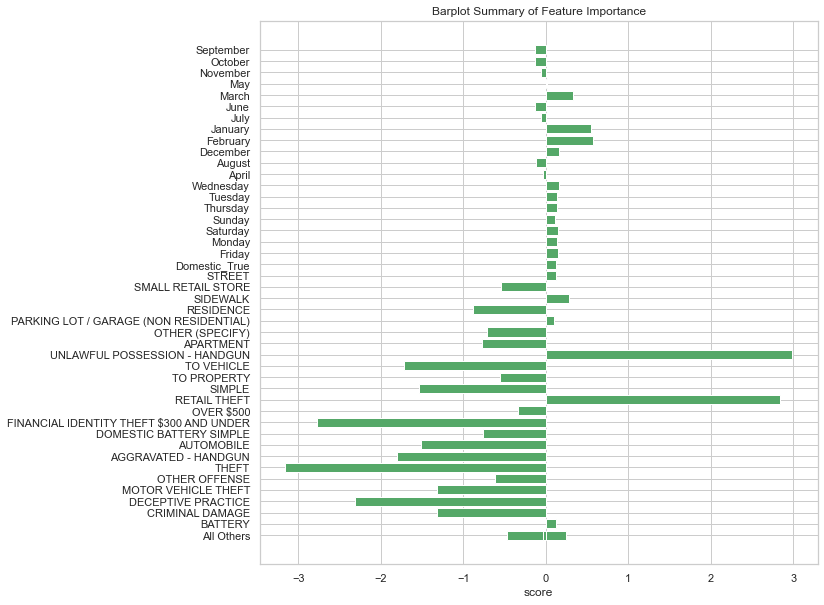

In [65]:
# Plotting Importance of Features to Show What Features are Pulling Us Closer to the Conclusion
# Positive scores lead indicates intensitu of feature Getting 1 value, i.e person getting arrested
# Negative scores lead to person not getting arrested

importance = logmodel.coef_.flatten()
plt.rcParams['figure.figsize'] = (10,10)
plt.barh(df_ml_final.columns, importance, color='g')
plt.title('Barplot Summary of Feature Importance')
plt.xlabel('score')
plt.show()

## Observation

Since our target variable arrest is highly imbalanced and has high proportion of arrest value as False, it is obvious that most features are having scores with negative values.

However, features such as Unlawful possession of handgun and Retail Theft are highest positive scores leading to arrests. In months, Jan and Feb are most prone to crimes leading to arrests. In terms of location, sidewalk has more propensity for arrests. We couldn't find a particular type of crime that would lead to arrest.

Based on this graph we could reduce dimensionality of our model by removing features which are closer to 0 and improve model performance.

# Recommendations/Conclusions:
    
## Type of Crime: 
Battery, Theft, and Criminal Damage account for > 50% of all crimes and should be prioritized by the department. This could be done by bringing out awareness amongst public and imposing stricter fines for these particular crime types.

## Month of Crime: 
Serious offence crimes, i.e., crimes leading arrests are peaking in the month of January each year. Hence, better preparation to counter such serious offences should be in place

## Place of Crime: 
Street, Apartments and Residence account for around 60% of the crime locations and there is huge gap between the distributions of crime over rest of the locations. Hence, better manpower planning is required to place them in these areas which have high proportion of crimes

## Description of Crime: 
The most common locations of crime such as Streets, Apartments and Residences have top five crime descriptions which occur very freqeuntly. The City to take a top down approach, countering crimes which are occuring more frequently first to bring down the crime rate in these areas.

## District Specific Recommendation: 
District 31 has very low frequency of crime. If this is not a result of a data collection error, this district could be a ideal or low crime District in Chicago. The city could study in detail what attributes are working good for that district and could replicate the learning to other priority districts too. The high priority District 11 needs attention as it has highest rates of arrestable crimes and narcotics crime rate of 35% out of the total narcotics crime in all districts of Chicago.

## Time of Crime:
After visualizing timestamps we could observe that the data is incomplete for time variable as the data contains timestamps between 12am midnight and 12pm noon. We couldn't find values of timestamps of crimes happening between 1pm to 12am midnight. This could have enhanced our time analysis in more depth 

## Crimes Leading to Arrests
Specific crimes like 'Unlawful possession of handgun' and 'Retail Theft' having higher probability of arrestable crimes and could be more closely monitored specifically for this category to arrest the arrest rates in the City. In terms of seasonality, the City should monitor the factors of why more arrestable crimes are proabable in Jan and Feb month compared to whole year. Also, in terms of locations, sidewalks needs to be more secure to avoid arrestable crimes in the City
